In [91]:
%load_ext autoreload
%autoreload 2

from NLP_Lib import *

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import math
import numpy as np
from numpy import dtype

# disable eager execution to use ELMo model
tf.compat.v1.disable_eager_execution()

# improve/change plot appearance
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# load in the training data, make sure it is the form we expect
training_df = pd.read_table(PATH_TO_TRAINING_DATA)
assert (training_df.shape[1] > 1 and CLASS_COL == training_df.columns[1]
    and training_df.shape[1] > 2 and SUBCLASS_COL == training_df.columns[2]
    and training_df.shape[1] > 3 and TEXT_COL == training_df.columns[3])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# *** Inspecting the data as it is at the beginning ***
training_df

,id,class,subclass,text
0,10525,Bart Simpson,Bart Simpson,This looks like a job for... fireplace tongs.
1,10526,Bart Simpson,Bart Simpson,Still dark. Better use the generator.
2,10527,Homer Simpson,Homer Simpson,Well... okay. If it'll end horror.
3,10528,Homer Simpson,Homer Simpson,"C'mon, pick up, pick up! I know you're there."
4,10529,Homer Simpson,Homer Simpson,"Family, today I graduate from my anger managem..."
...,...,...,...,...
48638,59457,Bart Simpson,Bart Simpson,All he does is lie there like an unemployed wh...
48639,59458,Bart Simpson,Bart Simpson,"Is, too. Watch, I'll prove it. Maggie, come to..."
48640,59459,Other,Chief Wiggum,Did you have that same backwards-talking dream...
48641,59460,Homer Simpson,Homer Simpson,Oh boy! Oh boy! Oh boy!


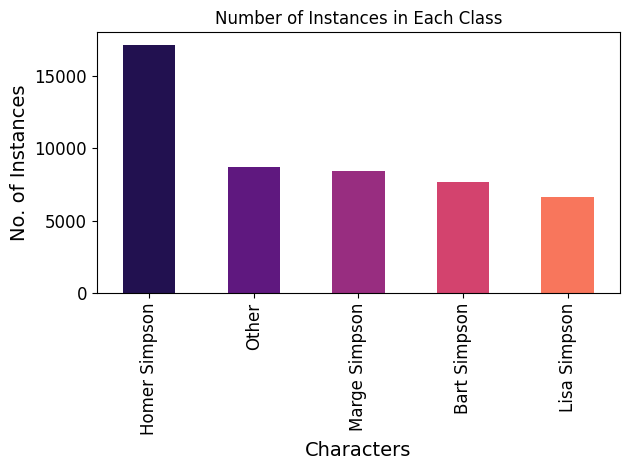

In [33]:
# looking at the number of instances per class, or label
make_and_save_inst_per_class_plot(
    training_df,
    plt,
    "Number of Instances in Each Class",
    CLASS_COL)

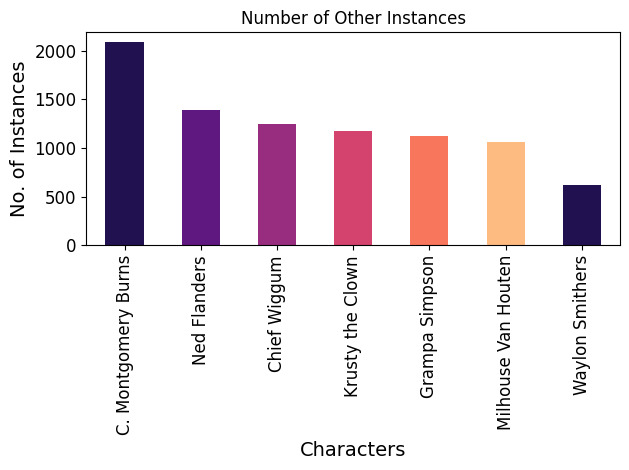

In [35]:
make_and_save_inst_per_class_plot(
    training_df[training_df[CLASS_COL] == "Other"],
    plt,
    "Number of Other Instances",
    SUBCLASS_COL)

In [92]:
# Cleaning and preprocessing the data

# Want to be able to do k-fold cross val eventually, so first shuffle the data
training_df = training_df.sample(frac=1).reset_index(drop=True)
training_df

,id,class,subclass,text
0,16943,Marge Simpson,Marge Simpson,"Homie, it's five p.m. We're having dinner."
1,55107,Marge Simpson,Marge Simpson,What? We're not ready to compete!
2,47095,Other,C. Montgomery Burns,Enough of your double-talk!
3,44967,Marge Simpson,Marge Simpson,"Oh, that's it. I'm gonna write you a ticket."
4,26742,Homer Simpson,Homer Simpson,I don't see Skinner anywhere.
...,...,...,...,...
48638,59364,Homer Simpson,Homer Simpson,Probably misses his old glasses.
48639,12914,Homer Simpson,Homer Simpson,"Yeah, right. A baby shot a guy."
48640,31274,Homer Simpson,Homer Simpson,Just squeeze your rage into a bitter little ba...
48641,18331,Lisa Simpson,Lisa Simpson,They sell your posters...workout DVDs...and al...


In [95]:
# Train, validate, tune hyperparams


In [ ]:
epochs = 150
batch_size = 128
X = get_X(training_df[TEXT_COL])
Y = tf.convert_to_tensor(training_df[CLASS_COL].map(map_class_to_float))
# call back to save model at each epoch.
# For every training, a new dir will be made so as to not overwrite past weights
# This will make checkpoints ./model_checkpoints/some_time/save_at_epoch_num.h5
checkpoint_dir_x = os.path.join(CHECKPOINT_DIR, datetime.now().strftime("%m/%d/%Y, %H:%M:%S"))
pathlib.Path(checkpoint_dir_x).mkdir(parents=True, exist_ok=True)
callbacks = [
    keras.callbacks.ModelCheckpoint(os.path.join(checkpoint_dir_x, "save_at_{epoch}.h5")),
]

# start training!
history = model.fit(
    x=X,
    y=Y,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2, # 0 is silent, 1 for loading bar, 2 for stats each epoch
    callbacks=callbacks)


plot_accuracy(plt, history, checkpoint_dir_x)
plot_loss(plt, history, checkpoint_dir_x)
# confusion_matrix(validation, model, plt, checkpoint_dir_x)

   